# Doc2Vec

Le and Mikolov in 2014 introduced the Doc2Vec algorithm, which usually outperforms such simple-averaging of Word2Vec vectors.

https://cs.stanford.edu/~quocle/paragraph_vector.pdf

The basic idea is: act as if a document has another floating word-like vector, which contributes to all training predictions, and is updated like other word-vectors, but we will call it a doc-vector. Gensim’s Doc2Vec class implements this algorithm.


https://radimrehurek.com/gensim/models/doc2vec.html


In [1]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [82]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=10, window=5, min_count=1, workers=4, seed = 0)

In [31]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [83]:
# duplicated "user"
duplicated_texts= [
     ['human', 'interface', 'computer'],
     ['survey', 'user', 'user','user', 'user','user', 'user','user', 'user','computer', 'system', 'response', 'time'],
     ['eps', 'user', 'user','user', 'user','user', 'user','user', 'user','interface', 'system'],
     ['system', 'human', 'system', 'eps'],
     ['user', 'user','user', 'user','user', 'user','user', 'user','response', 'time'],
     ['graph','trees'],
     ['trees'],
     ['graph', 'minors', 'trees'],
     ['graph', 'minors', 'survey']]

In [84]:
documents2 = [TaggedDocument(doc, [i]) for i, doc in enumerate(duplicated_texts)]
model2 = Doc2Vec(documents2, vector_size=10, window=5, min_count=1, workers=4, seed = 0)

In [85]:
model.wv['user'], model2.wv['user']

(array([-0.01891889, -0.0091159 , -0.02980401,  0.02008216, -0.02158123,
         0.0325665 ,  0.00983108,  0.03669152, -0.0015269 , -0.0073979 ],
       dtype=float32),
 array([-0.01898973, -0.00911209, -0.02986462,  0.02012529, -0.02158619,
         0.03259935,  0.00989106,  0.03665011, -0.00151132, -0.0074449 ],
       dtype=float32))

In [86]:
documents2

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]),
 TaggedDocument(words=['survey', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'computer', 'system', 'response', 'time'], tags=[1]),
 TaggedDocument(words=['eps', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'interface', 'system'], tags=[2]),
 TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]),
 TaggedDocument(words=['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'response', 'time'], tags=[4]),
 TaggedDocument(words=['graph', 'trees'], tags=[5]),
 TaggedDocument(words=['trees'], tags=[6]),
 TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]),
 TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])]

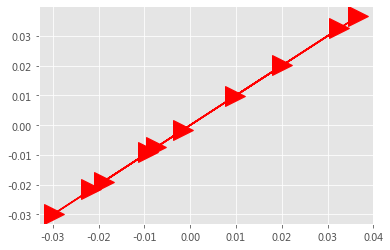

In [87]:
plt.plot(model.wv['user'], model2.wv['user'], 'r->', markersize = 20);

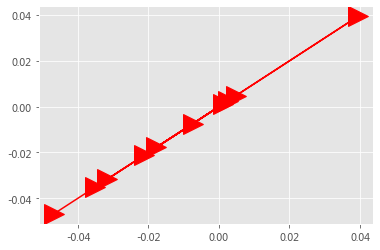

In [88]:
plt.plot(model.wv['survey'], model2.wv['survey'], 'r->', markersize = 20);

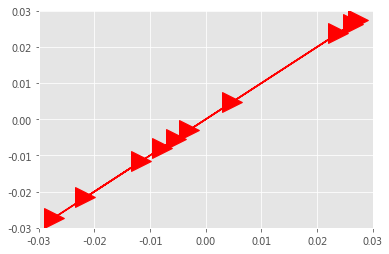

In [89]:
plt.plot(model.wv['computer'], model2.wv['computer'], 'r->', markersize = 20);

In [90]:
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
ind2word= {}
for i, w in enumerate(model.wv.vocab):
    rawWordVec.append(model[w])
    word2ind[w] = i
    ind2word[i] = w
    
rawWordVec = np.array(rawWordVec)

rawWordVec2 = []
word2ind2 = {}
ind2word2= {}
for i, w in enumerate(model2.wv.vocab):
    rawWordVec2.append(model2[w])
    word2ind2[w] = i
    ind2word2[i] = w
    
rawWordVec2 = np.array(rawWordVec2)

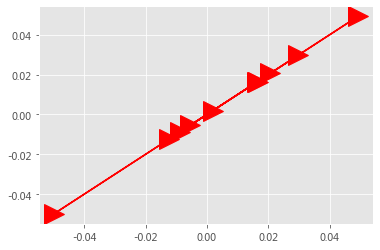

In [91]:
plt.plot(rawWordVec[0], rawWordVec2[0], 'r->', markersize = 20);

ValueError: too many values to unpack (expected 2)

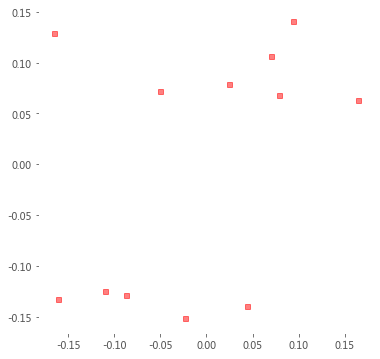

In [11]:
fig = plt.figure(figsize = (6, 6))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(rawWordVec[:, 0], rawWordVec[:, 1], 's', markersize = 5, alpha = 0.5, color = 'red')

for i in ['survey', 'computer', 'eps', 'interface', 'response']:
    x1, y1 = rawWordVec[word2ind['user']]
    x2, y2 = rawWordVec[word2ind[i]]
    ax.plot([x1, x2], [y1, y2], 'r--')

# 设置中文字体，否则无法在图形上显示中文
#zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/华文仿宋.ttf', size=26)
for k in ind2word:
    x,y = rawWordVec[k]
    if ind2word[k] in ['survey', 'computer', 'eps', 'interface', 'response', 'user']:
        plt.text(x, y, ind2word[k], alpha = 1, color = 'purple', fontsize = 16, rotation=0)
    else:
        plt.text(x, y, ind2word[k], alpha = 1, color = 'black', fontsize = 16, rotation=0)

plt.axis('off');

In [ ]:
fig = plt.figure(figsize = (6, 6))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(rawWordVec2[:, 0], rawWordVec2[:, 1], 's', markersize = 5, alpha = 0.5, color = 'red')

for i in ['survey', 'computer', 'eps', 'interface', 'response']:
    x1, y1 = rawWordVec2[word2ind['user']]
    x2, y2 = rawWordVec2[word2ind[i]]
    ax.plot([x1, x2], [y1, y2], 'r--')

# 设置中文字体，否则无法在图形上显示中文
#zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/华文仿宋.ttf', size=26)
for k in ind2word2:
    x,y = rawWordVec2[k]
    if ind2word2[k] in ['survey', 'computer', 'eps', 'interface', 'response', 'user']:
        plt.text(x, y, ind2word2[k], alpha = 1, color = 'purple', fontsize = 16, rotation=0)
    else:
        plt.text(x, y, ind2word2[k], alpha = 1, color = 'black', fontsize = 16, rotation=0)

plt.axis('off');

In [92]:
tsne = TSNE(n_components=2, n_iter=10000000)
X_tsne = tsne.fit_transform(rawWordVec)

tsne2 = TSNE(n_components=2, n_iter=10000000)
X_tsne2 = tsne2.fit_transform(rawWordVec2)

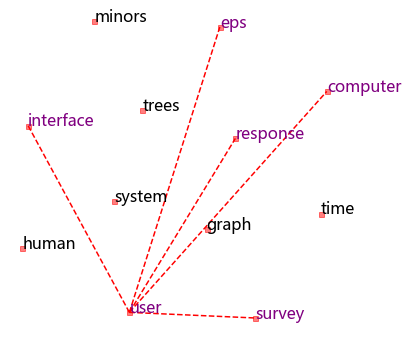

In [93]:
fig = plt.figure(figsize = (6, 6))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_tsne[:, 0], X_tsne[:, 1], 's', markersize = 5, alpha = 0.5, color = 'red')

for i in ['survey', 'computer', 'eps', 'interface', 'response']:
    x1, y1 = X_tsne[word2ind['user']]
    x2, y2 = X_tsne[word2ind[i]]
    ax.plot([x1, x2], [y1, y2], 'r--')

# 设置中文字体，否则无法在图形上显示中文
#zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/华文仿宋.ttf', size=26)
for k in ind2word:
    x,y = X_tsne[k]
    if ind2word[k] in ['survey', 'computer', 'eps', 'interface', 'response', 'user']:
        plt.text(x, y, ind2word[k], alpha = 1, color = 'purple', fontsize = 16, rotation=0)
    else:
        plt.text(x, y, ind2word[k], alpha = 1, color = 'black', fontsize = 16, rotation=0)

plt.axis('off');

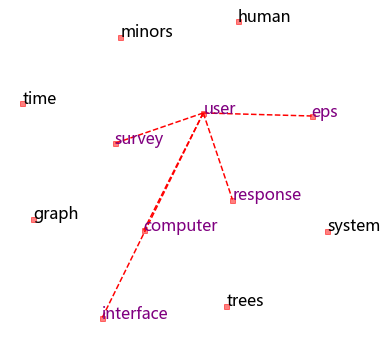

In [94]:
# 2
fig = plt.figure(figsize = (6, 6))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_tsne2[:, 0], X_tsne2[:, 1], 's', markersize = 5, alpha = 0.5, color = 'red')

for i in ['survey', 'computer', 'eps', 'interface', 'response']:
    x1, y1 = X_tsne2[word2ind2['user']]
    x2, y2 = X_tsne2[word2ind2[i]]
    ax.plot([x1, x2], [y1, y2], 'r--')

# 设置中文字体，否则无法在图形上显示中文
#zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/华文仿宋.ttf', size=26)
for k in ind2word2:
    x,y = X_tsne2[k]
    if ind2word2[k] in ['survey', 'computer', 'eps', 'interface', 'response', 'user']:
        plt.text(x, y, ind2word2[k], alpha = 1, color = 'purple', fontsize = 16, rotation=0)
    else:
        plt.text(x, y, ind2word2[k], alpha = 1, color = 'black', fontsize = 16, rotation=0)

plt.axis('off');


![](img/word2vec/w2v.png)